In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps, odeint
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from const import *

34.499999999999986


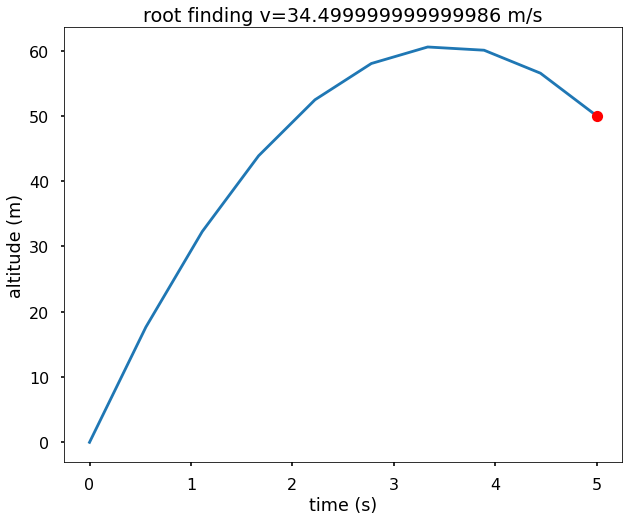

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
from scipy.optimize import fsolve

R = 20*rp

def fun(y, r):
    return [R*J/(r*epsilon_0*y[1]) - y[0]/r, e*y[0]/(Mp*y[1])]   # y는 E, u 로 이루어져있음

# = lambda t, s: np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)


t_eval = np.linspace(0, 5, 10)
y0 = 0
v0 = 25


r_list = np.linspace(R, rp, 1000)
y0 = 0
v0 = 25


def objective(v0):
    sol = solve_ivp(fun, [R, 0], [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)

print(v0)
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.show()

In [139]:
rp= 25e-6
J = 10
uB = 340
s = 10*rp

def cylindrical_sheath(s, uB, J, V_probe):
    R = rp + s
    r_list = np.linspace(R, rp, 10000)
    def fun(y, r):
        return [R*J/(r*epsilon_0*y[1]) - y[0]/r, e*y[0]/(Mp*y[1])]   # y는 E, u 로 이루어져있음

    sol = odeint(fun, y0=[0, uB], t=r_list)  # Sheath edge로 추정되는 부분에서 적분 시작
    u = sol[:, 1]

    ca_func = interp1d(r_list, u, 'cubic')
    s = fsolve(lambda r: np.sqrt(2*e*V_probe/(Mp)) - ca_func(r), rp)
    return s


In [140]:
cylindrical_sheath(s,uB, J, 20)

array([0.00011121])

66.28234035832276


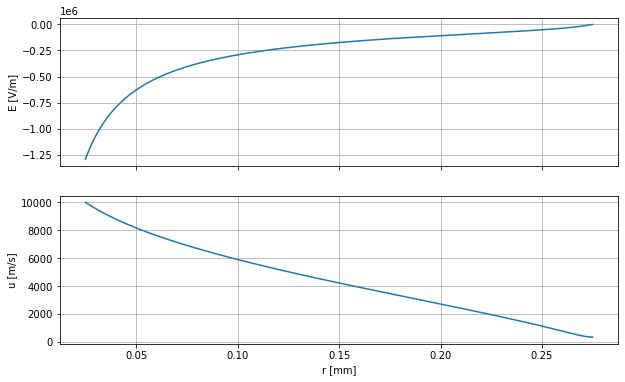

In [135]:
plt.subplots(figsize=(10,6))
ax1 = plt.subplot(2,1,1)
plt.plot(r_list*1e3, E)
plt.ylabel('E [V/m]')
plt.xticks(visible=False)
plt.grid(True)

ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(r_list*1e3, u)
plt.ylabel('u [m/s]')
plt.xlabel('r [mm]')
plt.grid(True)
print(V)

In [136]:
V_probe = 1
print('V:{}\t u:{:.2f}'.format(V_probe, np.sqrt(2*e*V_probe/(Mp))))


V:1	 u:1228.33


array([0.00024703])

In [138]:
simps(E[r_list > s], r_list[r_list >s])

0.9225380697519144

0.07457506622790444


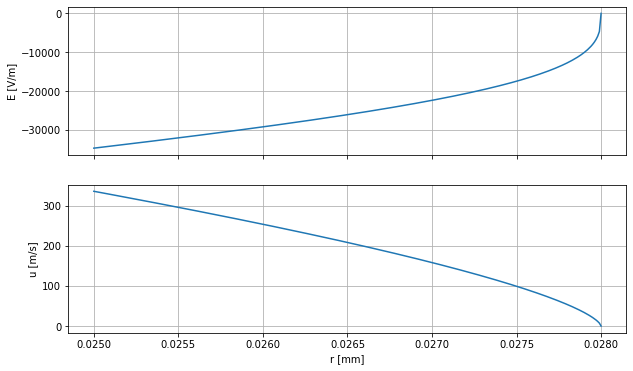

In [11]:


def cylindrical_sheath(s):
    R = rp + s
    r_list = np.linspace(R, rp, 300)
    def fun(y, r):
        return [R*J/(r*epsilon_0*y[1]) - y[0]/r, e*y[0]/(Mp*y[1])]   # y는 E, u 로 이루어져있음

    sol = odeint(fun, y0=[0, uB], t=r_list)  # Sheath edge로 추정되는 부분에서 적분 시작
    V = simps(sol[:, 0], r_list)
    return sol[:, 0], sol[:, 1], V, r_list

def child_law(s):
    V = (9/4/epsilon_0*J*s**2*np.sqrt(Mp/2/e))**(2/3)
    return V

E, u, V, r_list = cylindrical_sheath(s)

plt.subplots(figsize=(10,6))
ax1 = plt.subplot(2,1,1)
plt.plot(r_list*1e3, E)
plt.ylabel('E [V/m]')
plt.xticks(visible=False)
plt.grid(True)

ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(r_list*1e3, u)
plt.ylabel('u [m/s]')
plt.xlabel('r [mm]')
plt.grid(True)
print(V)



In [27]:
10**(np.log10(rp)-1)/rp

0.09999999999999996

In [28]:
s_list = np.logspace(np.log10(rp)-3, np.log10(rp)+2, 10000)
#s_list = np.linspace(1e-4*rp, 1e3*rp, 10000)
V_list = []
V_child_list = []

for s in s_list:
    V_list.append(cylindrical_sheath(s)[2])
    V_child_list.append(child_law(s))

V_list = np.array(V_list)
V_child_list = np.array(V_child_list)

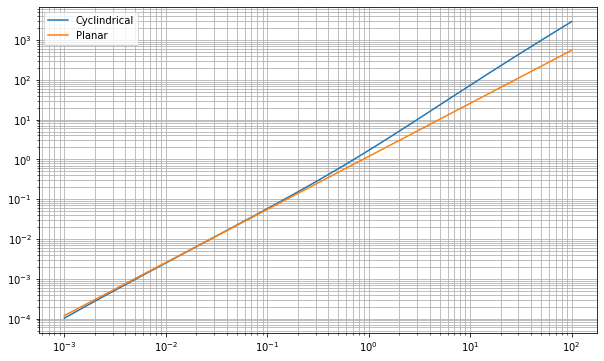

In [31]:
plt.figure(figsize=(10,6))
plt.plot((s_list)/rp, V_list)
plt.plot((s_list)/rp, V_child_list)

plt.legend(['Cyclindrical', 'Planar'])
plt.xscale('log')
plt.yscale('log')
plt.xticks()
#plt.xlim(1e-2,1e1)
#plt.ylim(1e-2,1e2)
plt.grid(True, 'both')

In [30]:
s_list/rp

array([1.00000000e-03, 1.00115207e-03, 1.00230547e-03, ...,
       9.97699834e+01, 9.98849255e+01, 1.00000000e+02])